###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT License. (c) 2019 Computational Geosciences Resource by UiS

# Introduction to Python and Jupyter Notebooks

This is a quick introduction to the Python programming language and the Jupyter Notebook framework. Notebooks let you run Python code interactively in a browser. We assume no prior programming experience, though if you have used MATLAB previously, you will find the Python syntax very similar. 

This notebook will only cover the basics of Python, with emphasis on scientific computing features needed for this resource. However, Python is a popular general-purpose programming language used in a wide variety of projects and industries. Did you know that Dropbox and Spotify are mainly written in Python? 

## Basics

A notebook is divided into computational units called "cells". Cells can contain text such as this one or Python code. Below is a cell with some common Python statements. Try changing the variables and re-run the cell. To run a cell, either click the "Run" button above, or type Ctrl+Enter.

In [1]:
a = 2
b = 9.0
c = a + b
print('The sum is: ', c)

# This is just a comment

name = 'Donald'
print('Hello, my name is', name)

The sum is:  11.0
Hello, my name is Donald


There are some other useful shortcuts you should know. To run a cell and move to the next cell, type Shift+Enter. To run a cell and insert a new cell below, type Alt+Enter. You can use the arrow keys to move quickly between cells. To run all the cells of a notebook, click "Cell -> Run all" in the menu.

### Conditionals
A conditional is used to perform different operations depending on a conditional statement. In Python, this is expressed in the following way:

In [2]:
a = 3
b = 5
if a > b:
    print('a is bigger than b')
elif a < b:    
    print('a is smaller than b')
else:
    print('a is equal to b')

a is smaller than b


Try changing the values of `a` and `b` to see how the output changes. Also, note that Python cares about white spaces, so there must be a tab indent or 4 spaces for each operation in the `if` statement. If not you will get an error as shown here: 


In [3]:
if a==b:
c = 3

IndentationError: expected an indented block (<ipython-input-3-27f7709c13ee>, line 2)

You can also use the boolean operators `and`, `or` and `not` in the conditional statement:

In [4]:
age = 30
if age > 18 and age < 34:
    print('You are a young adult')

if age < 18 or age > 80:
    print('You are not allowed to drive a car')

You are a young adult


### Loops
A loop is used to execute a group of statements multiple times. For instance, to print all numbers from 1 to 10 divisible by 3, we can use a `for` loop together with an `if` statement, and the modulus operator, `%`:

In [5]:
print('Numbers divisible by three:')
for i in range(1, 11):
    if i % 3 == 0:
        print(i)

Numbers divisible by three:
3
6
9


`range` is a Python function that iterates from the given first number up to the second number (but not including it). If we only give one number, the iteration will go from zero up to (but not including) the given number. We will give more examples of for loops later in this notebook.

### Functions and modules

If we have written a useful piece of code, we often want to use it again without copying and pasting the code multiple times. To do this, we use functions and modules. For instance, if we want to convert an angle from degrees to radians, we can use the following formula, 
\begin{equation}
    \alpha_\text{radians} = \alpha_\text{degrees}\frac{\pi}{180}
\end{equation}    
To put this into a callable function, we use the `def` keyword:

In [6]:
def deg_to_rad(angle_degrees):
    pi = 3.141592
    return pi*angle_degrees/180.0

angle_degrees = 45.0
print('Radians', deg_to_rad(angle_degrees))

Radians 0.785398


We can also include code from other places. This is useful to make your own library of functions that you can then use in many different notebooks. Using a text editor, create a file called mylib.py and put it in the same folder as your notebook. In the file, write a function to convert from radians to degrees:
```
def rad_to_deg(angle_radians):
    pi = 3.141592
    return angle_radians*180/pi
```
We can then import the code from the file and use it like this:

In [7]:
try:
    import mylib
    angle_radians = 0.785398
    print('Degrees', mylib.rad_to_deg(angle_radians))
    
except ModuleNotFoundError:
    print('Create a file called mylib.py')

Degrees 45.0


_Note_: If you make a change in mylib.py, the changes will not be immediately available in the notebook and it needs to be restarted . To circumvent this, we can use the following commands to always reload imported modules:

In [12]:
%load_ext autoreload
%autoreload

## Mathematics

To use Python as an environment for numerical mathematics, it is useful to use the `numpy` library for arrays and matrices, and the `matplotlib` library for plotting. See the links in the Help menu above for more information on these libraries. The following two lines import these libraries. The third line makes sure the plots are rendered in the notebook.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To define an array, we use the `numpy` `array` function:

In [9]:
a = np.array( [1, 2, 3, 4] )
print(a)

[1 2 3 4]


To access an array element, we use brackets with the index of the element. A very important difference compared to Matlab is that in Python the first element has index zero (like most other programming languages). We can also use negative indices to access values starting from the end of the array.

In [10]:
print(a[0], a[2])
print(a[-1])

1 3
4


Slicing is a very useful feature to extract subarrays. For instance, 

In [11]:
print(a[2:])
print(a[1:3])

[3 4]
[2 3]


Matrices are defined as multi-dimensional arrays.

In [12]:
a_matrix = np.array( [[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]] )
b_matrix = np.array( [[2, 4],
                   [3, 5],
                   [5, 7]] )
print(a_matrix)
print(b_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 4]
 [3 5]
 [5 7]]


We can get the number of rows and columns from the `shape` variable

In [13]:
nrow, ncol = b_matrix.shape
print('b has {} rows and {} columns'.format(nrow, ncol))

b has 3 rows and 2 columns


Let us make a function to multiply two matrices together. Considering an $n\times m$ matrix $\mathbf A$ and a $m\times p$ matrix $\mathbf B$. The formula to multiply these matrices can be written as:

\begin{equation}
 \mathbf C = \mathbf A\mathbf B = \sum_{k=1}^m \mathbf A_{ik}\mathbf B_{kj}
\end{equation}
for $i = 1, ..., n$ and $j = 1, ..., p$. Here, $\mathbf C$ will be a $n\times p$ matrix.

To implement this formula, we need to use a triple-nested loop, as shown in the function below:

In [14]:
def matrix_multiply(A,B):
    n, m = A.shape
    nrow_B, p = B.shape
    
    # Check that the matrices are conformable
    if not nrow_B == m:
        print('Error, the number of columns in A must be equal to the number of rows in B!')
        return -1
    
    # Initialize C using the numpy zeros function
    C = np.zeros((n, p))
    
    for i in range(n):
        for j in range(p):
            for k in range(m):
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
                
    return C

print(matrix_multiply(a_matrix, b_matrix))

[[ 23.  35.]
 [ 53.  83.]
 [ 83. 131.]]


Verify by hand calculation that the above result is correct. Remember, the element in the first row and first
column of $\mathbf C$ is equal to the sum of the product of the elements in the first row of $\mathbf A$ times the elements in the first column of $\mathbf B$, and so on.

What happens if you try the multiplication $\mathbf B \mathbf A$? Try it in the cell below:

Note that although the above function is short and elegant, it is not very efficient. The `numpy` library contains super-optimized code for common operations such as matrix multiplication. The `numpy` `dot` function can be used for matrix multiplication. Let's repeat the matrix multiplication above using the `dot` function:

In [15]:
C = np.dot(a_matrix, b_matrix)
print(C)

[[ 23  35]
 [ 53  83]
 [ 83 131]]


When working with large matrices, there is a significant impact on the runtime. To illustrate this, let's generate two 100x100 matrices with random numbers and time how long it takes to multiply them. The `%%timeit` command will run the cell a number of times and output the average time spent per run. The `numpy` `random.rand` function generates the arrays and fill them with random numbers.

In [16]:
%%timeit
N = 100
A = np.random.rand(N,N)
B = np.random.rand(N,N)
C = matrix_multiply(A,B)

643 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Try changing the multiplication function from `matrix_multiply` to `np.dot` and note the difference in runtime. On a standard computer, our `matrix_multiply` function uses $\approx 800$ milliseconds, while the built-in `dot` function uses $\approx 300$ _micro_ seconds. The built-in function is a staggering 2500 times faster! 

### Plotting
Arrays can be easily plotted using the `matplotlib` `plot` command. Below we plot the sinusoidal function. We use the `numpy` `linspace` function to generate an array with equally spaced values between the start and end point, and the `numpy` `sin` function to take the sine of the array. With a low number of points, the curve is actually jagged. Increase the number of points n in the `linspace` command to get a smoother curve. Try values of n = 100, 1000, and 10000.

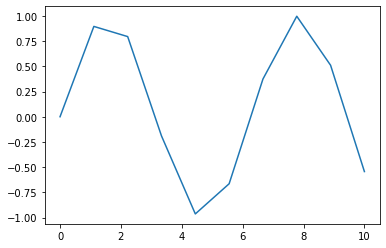

In [17]:
# The linspace command gives us an equally spaced array, the syntax is
# linspace(start_point, end_point, number_of_points)
n = 10
x = np.linspace(0, 10, n)
y = np.sin(x)
plt.plot(x, y)

We end with a slightly more advanced plot, showing how to change line style and markers, and add axis labels and a legend. The `numpy` `cos` function takes the cosine of the array, and `xlabel`, `ylabel` and `legend` are all `matplotlib` commands.

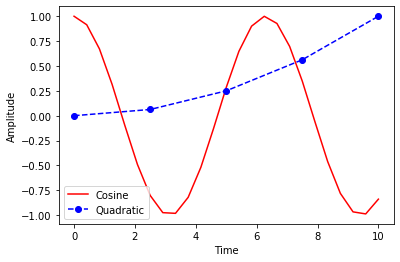

In [18]:
n = 25
x = np.linspace(0, 10,25)
y = np.cos(x)
plt.plot(x, y, 'r')
x = np.linspace(0,10,5)
y = 0.01*x**2
plt.plot(x,y,'bo--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(['Cosine', 'Quadratic'])